Resultados esperados:
 - input: 
    - avg_runtime
    - input_complexity
    - speedup
    - eficiencia
 - output: 
    - p_cores


In [13]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

In [2]:
df_clean = pd.read_csv("dataset/clean_data.csv")

# df_clean = df_clean.round(decimals=2)

# df_clean['cores'] = df_clean['cores']/df_clean['cores'].max()
df_clean['input'] = df_clean['input']/df_clean['input'].max()

In [4]:
df_clean.columns

Index(['cores', 'input', 'average_runtime', 'speedup', 'efficiency', 'mem_ram',
       'freq_mem', 'freq_cpu', 'mem_l3'],
      dtype='object')

In [3]:
X = df_clean[['cores', 'input', 'average_runtime', 'speedup', 'mem_ram', 'freq_mem', 'freq_cpu', 'mem_l3']].values
y = df_clean['efficiency'].values

### Regression Models

#### MLP Regression Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [24]:
learning_rate = 0.00001
input_shape = (X_train.shape[1],)

# callback = EarlyStopping(monitor="loss", patience=30)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape = input_shape))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, batch_size=32, epochs=1000, verbose=2, validation_data=(X_test, y_test))

Epoch 1/1000
52/52 - 0s - loss: 1491.6233 - mse: 1491.6233 - val_loss: 1381.7686 - val_mse: 1381.7686 - 349ms/epoch - 7ms/step
Epoch 2/1000
52/52 - 0s - loss: 990.6586 - mse: 990.6586 - val_loss: 668.0071 - val_mse: 668.0071 - 54ms/epoch - 1ms/step
Epoch 3/1000
52/52 - 0s - loss: 838.3183 - mse: 838.3183 - val_loss: 1067.5907 - val_mse: 1067.5907 - 55ms/epoch - 1ms/step
Epoch 4/1000
52/52 - 0s - loss: 768.1786 - mse: 768.1786 - val_loss: 1140.3903 - val_mse: 1140.3903 - 53ms/epoch - 1ms/step
Epoch 5/1000
52/52 - 0s - loss: 756.9573 - mse: 756.9573 - val_loss: 558.4232 - val_mse: 558.4232 - 53ms/epoch - 1ms/step
Epoch 6/1000
52/52 - 0s - loss: 655.4279 - mse: 655.4279 - val_loss: 604.4999 - val_mse: 604.4999 - 53ms/epoch - 1ms/step
Epoch 7/1000
52/52 - 0s - loss: 581.4407 - mse: 581.4407 - val_loss: 429.7954 - val_mse: 429.7954 - 54ms/epoch - 1ms/step
Epoch 8/1000
52/52 - 0s - loss: 523.3958 - mse: 523.3958 - val_loss: 420.6638 - val_mse: 420.6638 - 53ms/epoch - 1ms/step
Epoch 9/1000
52

In [25]:
loss = model.evaluate(X_test, y_test)
print(f'Erro no conjunto de teste: {loss}')

predictions = model.predict(X_test)

for i in range(10):
    print(f'Valor Real: {y_test[i]}, Previsão: {predictions[i][0]}')

23/23 [==============================] - 0s 591us/step - loss: 7.2466 - mse: 7.2466
Erro no conjunto de teste: [7.2466301918029785, 7.2466301918029785]
23/23 [==============================] - 0s 500us/step
Valor Real: 0.1421652660989802, Previsão: 0.2119438648223877
Valor Real: 0.1909549526707994, Previsão: 0.30947208404541016
Valor Real: 0.1362309885647307, Previsão: 0.14308547973632812
Valor Real: 0.0688319593505949, Previsão: 0.10650956630706787
Valor Real: 0.1343610885294778, Previsão: 0.06612074375152588
Valor Real: 0.1712759335286006, Previsão: 0.1330481767654419
Valor Real: 0.1254793398850434, Previsão: 0.0225522518157959
Valor Real: 0.1133989266295716, Previsão: 0.12758374214172363
Valor Real: 0.1366358050892372, Previsão: 0.18871450424194336
Valor Real: 0.1045667369935413, Previsão: 0.20521438121795654


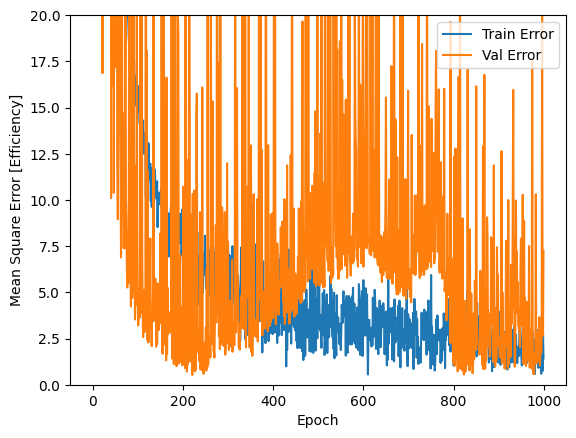

In [26]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Efficiency]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

#### MLP Regression Model with Leave-One-Out-Validation (LOOCV)

In [9]:
loo = LeaveOneOut()
mse_scores = []
callback = EarlyStopping(monitor="loss", patience=20)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))


for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    learning_rate = 0.001
    input_shape = (X_train.shape[1],)

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[callback])

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

print(f'Erro médio quadrático usando LOOCV: {min(mse_scores)}')

1/1 [==============================] - 0s 32ms/step
Erro médio quadrático usando LOOCV: 1.275249829290668e-10


In [28]:
PATH_MODEL_SAVE = "model/pascal_model_v2.keras"

model.save(PATH_MODEL_SAVE)